Start off by importing all the required packages

In [12]:
import numpy as np
np.random.seed(0)
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Next we generate the dataset and the scatter plot.

((1000,), (1000, 2))

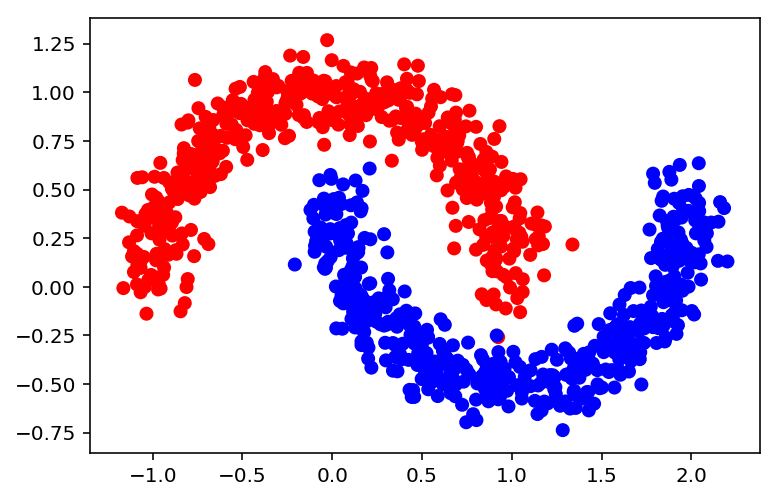

In [13]:
X, y = datasets.make_moons(n_samples=1000, noise=0.1, random_state=0)
colors = ['blue' if label == 1 else 'red' for label in y]
plt.scatter(X[:,0], X[:,1], color=colors)
y.shape, X.shape

## Defining the Model 
The Keras Python library makes creating deep learning models fast and easy.

The sequential API allows you to create models layer-by-layer for most problems. Keras has different activation functions built in such as 'sigmoid', 'tanh', 'softmax', and [many others](https://keras.io/optimizers/). Also built in are different weight initialization options. We use the sigmoid activation which limits the values to $[-\epsilon,\epsilon]$

This initialization method corresponds to the `'glorot_uniform'` initialization option in Keras.

In [15]:
# Define our model object
model = Sequential()

# kwarg dict for convenience
layer_kw = dict(activation='sigmoid', init='glorot_uniform')

# Add layers to our model
model.add(Dense(output_dim=5, input_shape=(2, ), **layer_kw))
model.add(Dense(output_dim=5, **layer_kw))
model.add(Dense(output_dim=1, **layer_kw))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_shape=(2,), activation="sigmoid", units=5, kernel_initializer="glorot_uniform")`
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=5, kernel_initializer="glorot_uniform")`
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  # Remove the CWD from sys.path while we load stuff.


## Defining the Optimizer 
While initializing the Keras model we also need to specify an optimizer such as SGD or Adam or RMSProp. In this case we will use SGD. You can however read more about them [here](https://keras.io/optimizers/).

In [16]:
sgd = SGD(lr=0.001)

## Compile the Model 
A loss function (or objective function, or optimization score function) is one of the two parameters required to compile a model, the other being the optimizer itself. 


In [18]:
model.compile(optimizer=sgd, loss='binary_crossentropy')

## Summarize the Model
Keras allows for models to be summarized using `model.summary()`.


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


## Train the Model
We can now train our model using the `model.fit()` method. We will save this as history to refer to it at a future point. Since the number of epochs is very high we will set `verbose=0` and shuffle the data as well. 


In [ ]:
history = model.fit(X[:500], y[:500], verbose=0, nb_epoch=4000, shuffle=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


## Visualizing the Results

In [1]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    
    return fig, ax